# NAND Project 2: Analysis of Titanic Passenger Data

## Purpose of Analysis

The data set contains the following information about 891 of 2224 passengers on board of Titanic. 

        survival        Survival
                        (0 = No; 1 = Yes)
        pclass          Passenger Class
                        (1 = 1st; 2 = 2nd; 3 = 3rd)
        name            Name
        sex             Sex
        age             Age
        sibsp           Number of Siblings/Spouses Aboard
        parch           Number of Parents/Children Aboard
        ticket          Ticket Number
        fare            Passenger Fare
        cabin           Cabin
        embarked        Port of Embarkation
                        (C = Cherbourg; Q = Queenstown; S = Southampton)
                  
With data analysis we can possible answer the following questions:

1. What are the survival rate of all passengers? What are the rate among male and female respectively?
2. What is the age distribution of passenger? What is the age distribution of survivors? Are there a statistical proof that younger people were giving priority to survive?
3. Were first class passengers given priority to survive?
4. Are the people with family on board given priority to survive?
5. Can this sample represent the whole population of passengers on board?

## Step I: Accquiring and Importing Data Set:

First, the csv file is imported in as a pandas data frame. First 5 rows are displayed.

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

titanic_df.head(5)

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step II: Data Wrangling

### 1. Check if there is any missing data in each column.

In [2]:
print len(titanic_df)
print titanic_df.isnull().sum()

891
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


So there are 177 record missing the age of the passengers. There are more missing records for Cabin info, but I probably won't use the info in 'Cabin' and 'Embarked'.

### 2. Check if there are any duplicated rows

In [3]:
print titanic_df.duplicated().sum()

0


No duplicate information is found.

### 3.Check if there are any strange numbers in each column

In [4]:
titanic_df.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
Cabin                                    T
Embarked                                 S
dtype: object

In [5]:
titanic_df.min()

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                             0
Cabin                          inf
Embarked                       inf
dtype: object

It doesn't look like there is any out of range number in the data, besides the NaNs.

## Data Exploration

### 1. Male or Female

First let's look at the whole group.

In [6]:
def survive_rate(group_df):
    return group_df['Survived'].mean()

def print_survival_rate(group_df):
    print 'There are totally {0} passengers in this sample group.'.format(len(group_df))
    print 'There are {0} passengers survived.'.format(group_df['Survived'].sum())
    print 'The survival Rate is: {:0,.2f}'.format(survive_rate(group_df))

print_survival_rate(titanic_df)

There are totally 891 passengers in this sample group.
There are 342 passengers survived.
The survival Rate is: 0.38


Then group the passengers by gender and calculate survival rate for each group:

In [7]:
titanic_df.groupby('Sex').apply(len)

Sex
female    314
male      577
dtype: int64

In [8]:
titanic_df.groupby('Sex').apply(survive_rate)

Sex
female    0.742038
male      0.188908
dtype: float64

There are 314 female passengers (35%) and 577 male passengers (65%).  
Female survival rate 74% is dramatically higher than male survival rate 19%.

### 2. Age Distribution and Children Priority




First remove 'Cabin' and 'Embarked' Columns, then drop the records without age info. There should be 891-177=714 records left.

In [9]:
titanic_age_df=titanic_df.drop(['Cabin','Embarked'],axis=1).dropna()
print_survival_rate(titanic_age_df)

There are totally 714 passengers in this sample group.
There are 290 passengers survived.
The survival Rate is: 0.41


Notice this survival rate of the whole age group 41% is higher than the whole sample group 38%. This means for the passenger records without age information the survival rate is lower than average.

Plot the age distribution of the whole group.

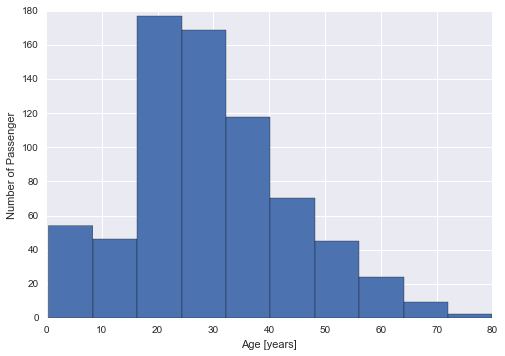

In [10]:
def age_hist(group_df):
    hist=group_df['Age'].hist()
    hist.set_xlabel('Age [years]')
    hist.set_ylabel('Number of Passenger')
    
age_hist(titanic_df)

In comparison, the age ditribution of the survived group:

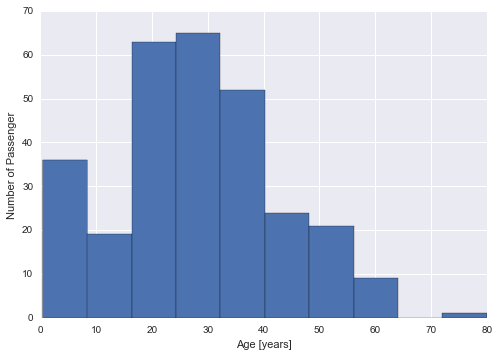

In [11]:
# Create a seperate group for survivors with age data
survivors_age_df=titanic_age_df[titanic_age_df['Survived']==1]
#Histogram of survivor's ages
age_hist(survivors_age_df)


The age distributions don't show significant difference. So let's look at the statistics:

In [12]:
titanic_age_df.groupby('Survived')['Age'].describe()

Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64

There are not obvious difference on age statistics among the survival and non-survival groups.   
The survival rate within each age range can be plotted as:

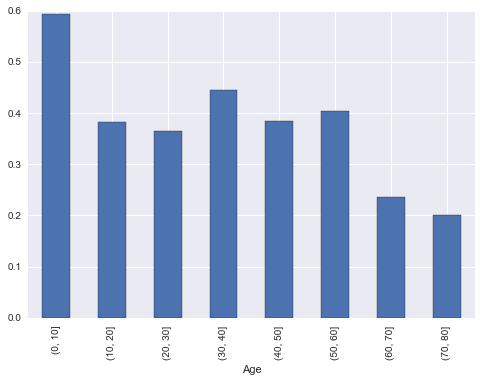

In [88]:
titanic_age_df.groupby(pd.cut(titanic_age_df['Age'], np.arange(0, 90, 10)))['Survived'].mean().plot(kind='bar')

Furthermore, if we assume anyone less than 18 years old is a child. We can exame the subgroup of age <18.

In [14]:
#Add one column to the data indication if the survivor is a child (age<18)
titanic_age_df['is_child']=titanic_age_df['Age']<18
# Create seperate group for children
children_df=titanic_age_df[titanic_age_df['is_child']==True]
print 'Among children (Age<18):'
print_survival_rate(children_df)
print '\nSurvival rates among childre: boys vs girls:'
print children_df.groupby(['Sex']).apply(survive_rate)

Among children (Age<18):
There are totally 113 passengers in this sample group.
There are 61 passengers survived.
The survival Rate is: 0.54

Survival rates among childre: boys vs girls:
Sex
female    0.690909
male      0.396552
dtype: float64


There does seem to higher survival rate among children 54% vs the all age group of 41%, but not significantly. Especially, the female survivor rate among children is lower than that of adults. That means age alone does not predict the likelyhood of surviving. We should look at the other parameters. 

### 3. Passenger Class

The breakdown of passengers in each class is as follows:

In [15]:
titanic_df.groupby('Pclass').apply(len)

Pclass
1    216
2    184
3    491
dtype: int64

Plot these in histogram:

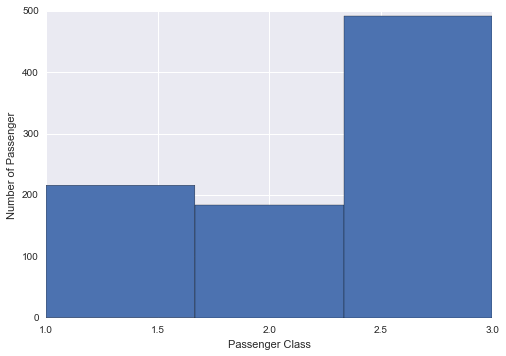

In [16]:
def pclass_hist(group_df):
    hist=group_df['Pclass'].hist(bins=3)
    hist.set_xlabel('Passenger Class')
    hist.set_ylabel('Number of Passenger')

#Plot the passenger class distribution of the whole group
pclass_hist(titanic_df)

In comparison, plot the histogram of passenger classes among survivors:

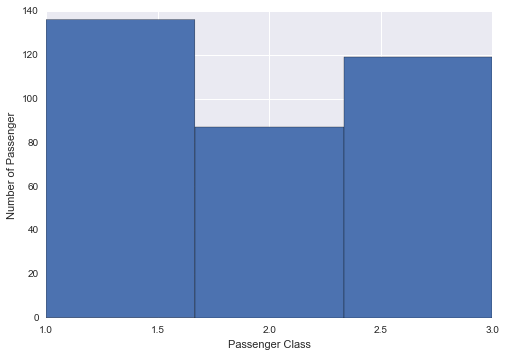

In [17]:
# Create a seperate group for survivors and non-survivors
survivors_df=titanic_df[titanic_df['Survived']==1]
pclass_hist(survivors_df)

There are more survivors in first class than other two classes. This can be also observed from survival rate:

In [18]:
print 'Survival rate for each class'
print titanic_age_df.groupby(['Pclass']).apply(survive_rate)
print '\nSurvival rates for each class: female vs. male'
print titanic_df.groupby(['Pclass','Sex']).apply(survive_rate)

Survival rate for each class
Pclass
1    0.655914
2    0.479769
3    0.239437
dtype: float64

Survival rates for each class: female vs. male
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
dtype: float64


   Females in the 1st and 2nd class have the highest survival rates (96% and 92%). Third class passengers were least likely to survive.
   
   Now focus on the children group (age<18):

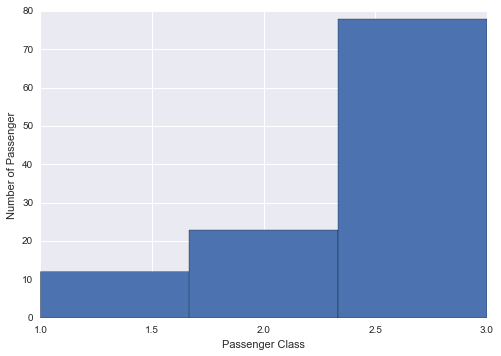

In [19]:
#Plot histogram of class for children
pclass_hist(children_df)

So majority of children were in the third class. This explains why children did not have a much higher overal survival rate.

In [20]:
print titanic_age_df.groupby(['Pclass','is_child']).apply(survive_rate)

Pclass  is_child
1       False       0.637931
        True        0.916667
2       False       0.413333
        True        0.913043
3       False       0.202166
        True        0.371795
dtype: float64


So children (Age<18) did have higher survival rate within each passenger class. The overall survival rate was dragged down by the thrid class children.

Now the distribution of survivors and non-survivors across age and class can be viewed as voilin plots. The survivor plot is shown in red and the non-survivor plot is shown in blue as follows:

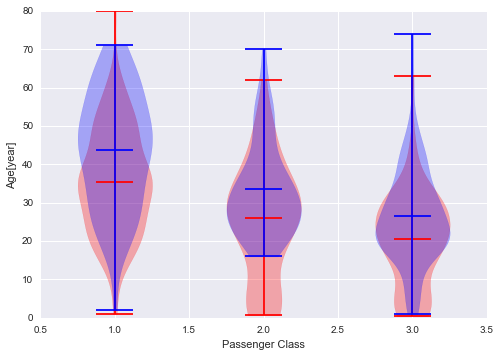

In [83]:
# Create a seperate group for survivors and non-survivors with age info
survivors_age_df=titanic_age_df[titanic_age_df['Survived']==1]
non_survivors_age_df=titanic_age_df[titanic_age_df['Survived']==0]

def set_violin_colors(violin_parts, fillcolor,linecolor):
    for pc in violin_parts['bodies']:
        pc.set_facecolors(fillcolor)
        pc.set_edgecolors(fillcolor)
    violin_parts['cbars'].set_color(linecolor)
    violin_parts['cmaxes'].set_color(linecolor)
    violin_parts['cmins'].set_color(linecolor)
    violin_parts['cmeans'].set_color(linecolor)

#all_data=[np.random.normal(0,std,100) for std in range(6,10)]
#all_data
# First Class Age info:

plt.figure()
ax=plt.subplot(111)
survivor_age_class=[survivors_age_df[survivors_age_df['Pclass']==i]['Age'].values for i in range(1,4)]
s_plot=plt.violinplot(survivor_age_class, showmeans=True)
set_violin_colors(s_plot,'red','red')

non_survivor_age_class=[non_survivors_age_df[non_survivors_age_df['Pclass']==i]['Age'].values for i in range(1,4)]
ns_plot=plt.violinplot(non_survivor_age_class, showmeans=True)
set_violin_colors(ns_plot,'blue','blue')

plt.ylabel('Age[year]')
plt.xlabel('Passenger Class')

If break down each passenger class by children or adults and gender:

In [ ]:
titanic_age_df.groupby(['Pclass','is_child','Sex',]).apply(len)

In [ ]:
titanic_age_df.groupby(['Pclass','is_child','Sex',]).apply(survive_rate)

In the first class for this sample, one girl out of 8 didn't survive, while all 4 boys survived. In the second class, all 12 girls survived.

### 4. Family Memebers

In [ ]:
# First add one column to the data indicating is family number is on board
titanic_df['has_family']=(titanic_df['SibSp']+titanic_df['Parch'])>0
print titanic_df['has_family'].sum()
titanic_df.groupby(['has_family']).apply(survive_rate)

There is slightly higher survival rate for passengers with family on board.

In [ ]:
# First add one column to the data indicating is family number is on board
titanic_age_df['is_parch']=(titanic_age_df['Parch'])>0
titanic_age_df.groupby(['is_child','is_parch']).apply(survive_rate)

Assuming adults who has parents or children are parents, the survival rate as parents (52%) is hight than otherwise (35%). 

Let's look at the breakdown of counts and survival rates for age group, gender group and whether they are parents or children.

In [ ]:
print 'Counts:'
print titanic_age_df.groupby(['is_child','Sex','is_parch']).apply(len)
print '\nSurvival rate:'
print titanic_age_df.groupby(['is_child','Sex','is_parch']).apply(survive_rate)

Observations:
1. For female adults, whether someone is a parent or not does not affect survival rate.
2. For male adults, it is slightly higher. 
3. For young girls, the survival rates were even higher for girls without parent. 
4. For young boys, the ones with parents were more likely to survive.


It is interesting to notice that there were 17 girls and 15 boys (of age <18) were on board without a parent. One would assume these are older childrens, possibly teens. The statistics are shown as follows:

In [ ]:
print children_df[children_df['Parch']==0]['Age'].mean()

Indeed, the average age of these children is 15.3 years. Now we look at the statistics:

In [ ]:
print 'Counts:'
print children_df[children_df['Parch']==0].groupby(['Pclass','Sex'])['Age'].apply(len)
print '\nAverage Age:'
print children_df[children_df['Parch']==0].groupby(['Pclass','Sex'])['Age'].mean()
print '\nThe survival rates are:'
print children_df[children_df['Parch']==0].groupby(['Pclass','Sex']).apply(survive_rate)


This probably means, in the 1910s, people of age more than 15 are considered adults. Majority of the these 'young adults' were in the lower passenger classes. The survival rate for the males among them are extremely low: 0% in the third class and 15% in the third class. 

### 5. Confidence of Analysis


According to online resource (http://www.historyonthenet.com/titanic/passengers.htm) there were 1316 passengers on board,  of which 498 survived. 

In this study we have a sample of 891 passengers. In order to understand whether the data is representative to the whole passenger population, here is the calculation of confidence interval:


In [ ]:
import scipy.stats as st

def confidence_interval(data,confidence_level,n,n_pop,tail):
    n_corr=n*(n_pop-1)/(n_pop-n)
    if tail==2:
        p=1-(1-confidence_level)/2
        return st.norm.ppf(p)*data.std(ddof=0)/sqrt(n_corr)
    elif tail==1:
        return st.norm.ppf(confidence_level)*data.std(ddof=0)/sqrt(n_corr)
    else:
        print "tail has to be 1 or 2"
        return

print 'The confident interval of survival rate is {:0,.2f}%.'\
        .format(100*confidence_interval(titanic_df['Survived'], 0.95, 891,1316,2))

#

Confidence interval of confidence level 95% for survival rate is 0.018 or 1.8%. This means, with the survival rate of 38.4% of the sample group of size 891,  the we are 95% sure the survival rate for all passengers on board Titanic is between 36.6% and 40.2%. Actually according to http://www.historyonthenet.com/titanic/passengers.htm, total number of passengers survived is 498. So the population survival rate is indeed around 38%, which is within the confidence interval. This means the size of the sample is big enough to represent the survival rate of the whole passenger population on board.

The same method can be applied to study the gender composition, pclass distribution and age distribution. 

## Step IV: Conclusions

The results from data analysis can be summaried as:  
1. The survivale rate of female is much higher than male.

2. Childrens are more likely to survive in each passenger class, but not overall. This is due to more children were located in the third class. (Note there are 177 records missing age info, these entries had been excluded from analysis concerning ages.)

3. First class passenger are more likely to survive than those in second and third.

4. Having a family number slightly increase the survial rate.

5. The confidence interval for survival rate of overall group is 1.8%. This agrees with the actual number of the whole population of passengers on Titanic.

### Interesting Discoveries:

1. Among all passengers, the female in first class has the highest survival rate (97%), and the male adults in the second class has the lowest (6%).
2. Most young children were in the third class. Only 37% of these young people survived. However, as 18 years old or younger, there is no difference in survival rate if he/she is in first or second class.
3. There are some teenagers travelling without parents. In the 1910s, a 15 year-old might have been considered an adult. The average age of the boys is 15.7 years old, and survival rate among the males is only 13%. This implies that they were considered as adults while setting priorities to get onto the lifeboats.
4. The oldest person in the group is 80 years old Mr. Barkworth. He was a first class passenger and survived the disaster. At the end of this project, I was curious enough to search his story online, but found it was actually a mistake on the record of his age. He should have been 47 years old at the time of Titanic sink. He indeed lived until 80 years old, but that was when he died 33 years later. Maybe I should have corrected this mistake at the beginning of the data analysis. 

### Limitations of Analysis:

1. The analysis is based on a limit sample among the whole passenger population. Especially those with names recorded. This might potentially pose a bias towards selecting first class passengers, who are socially better known, and those who have survived family members.

2. The dataset does not represent the whole population on board RM Titanic, because there were also 913 crew members on board, which survival rate is lower than passengers. So analysis on passenger population alone is not complete for consideration of evacuation capacity.

### Furture Research:

1. What cabin location gives passengers more chance of survival? Are these cabins close to lifeboat stations? This could be further explored, especially for the third class passenger. This could be useful for designing evacuation plan of the vessel.

2. How many women lost their husbands from Titanic? How many children lost their fathers? From the last names of the passengers, families could be identified. Further Analysis could be done to extract the "sad" statistics.